In [1]:
!pip install tensorflow==1.8.0

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

data = pd.read_csv('Admission_Predict.csv')
data

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
tf.__version__

'1.8.0'

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
data_corr = data.corr()
data_corr

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


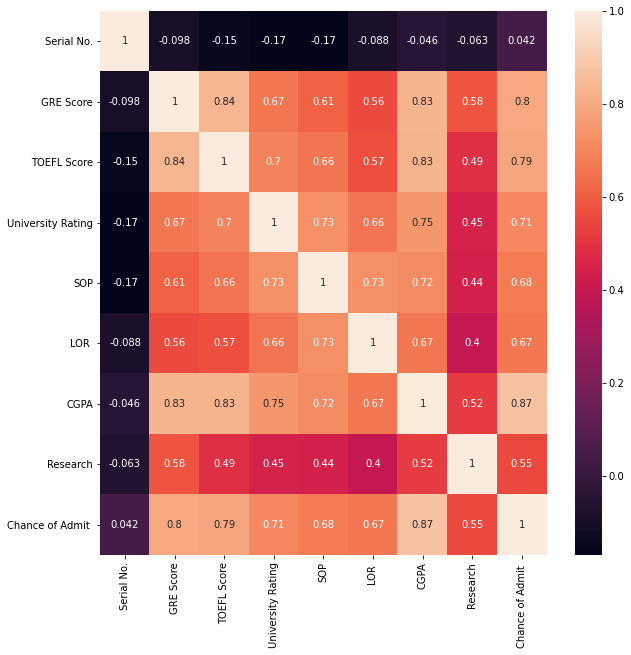

In [8]:

plt.figure(figsize=(10,10))
sns.heatmap(data_corr, annot=True)
plt.show()

In [9]:
train_y = data['Chance of Admit ']
del data['Chance of Admit ']
del data['Research']

In [10]:
train_y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [11]:
del data['Serial No.']

In [12]:
data = data.astype(np.float32)

In [13]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,337.0,118.0,4.0,4.5,4.5,9.65
1,324.0,107.0,4.0,4.0,4.5,8.87
2,316.0,104.0,3.0,3.0,3.5,8.00
3,322.0,110.0,3.0,3.5,2.5,8.67
4,314.0,103.0,2.0,2.0,3.0,8.21
...,...,...,...,...,...,...
395,324.0,110.0,3.0,3.5,3.5,9.04
396,325.0,107.0,3.0,3.0,3.5,9.11
397,330.0,116.0,4.0,5.0,4.5,9.45
398,312.0,103.0,3.0,3.5,4.0,8.78


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    float32
 1   TOEFL Score        400 non-null    float32
 2   University Rating  400 non-null    float32
 3   SOP                400 non-null    float32
 4   LOR                400 non-null    float32
 5   CGPA               400 non-null    float32
dtypes: float32(6)
memory usage: 9.5 KB


In [15]:
test = pd.read_csv('Admission_Predict_Ver1.1.csv')
test

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [16]:
test_y = test['Chance of Admit ']
del test['Chance of Admit ']
del test['Research']
del test['Serial No.']
test_y.shape

(500,)

In [17]:
test_y = np.array(test_y).reshape(len(test_y), 1)


In [18]:
train_y = np.array(train_y).reshape(len(train_y) , 1)

In [19]:
train_y.shape

(400, 1)

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data2 = scaler.fit_transform(data)
train_y2 = scaler.fit_transform(train_y)

In [39]:
train_y2 = scaler.fit_transform(train_y)

In [32]:
test2 = scaler.fit_transform(test)

In [41]:
test_y2 = scaler.fit_transform(test_y)

In [22]:
data2

array([[0.94000006, 0.92857146, 0.75      , 0.875     , 0.875     ,
        0.91346145],
       [0.6800003 , 0.5357144 , 0.75      , 0.75      , 0.875     ,
        0.66346145],
       [0.52      , 0.42857146, 0.5       , 0.5       , 0.625     ,
        0.38461542],
       ...,
       [0.8000002 , 0.85714316, 0.75      , 1.        , 0.875     ,
        0.84935904],
       [0.44000006, 0.3928573 , 0.5       , 0.625     , 0.75      ,
        0.6346154 ],
       [0.86000013, 0.8928573 , 0.75      , 1.        , 0.75      ,
        0.91666675]], dtype=float32)

In [23]:
test = test.astype(np.float32)

In [86]:
# 변수
X = tf.placeholder(tf.float32,shape=[None,6])


Y = tf.placeholder(tf.float32,shape=[None, 1])
W = tf.Variable(tf.random_normal([6,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
 
# 가설
hypothesis = tf.matmul(X,W) + b
 
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# cost function 최소화
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train = optimizer.minimize(cost)
 
# 세션 생성
with tf.Session() as sess:
    # 사용할 변수 선언
    sess.run(tf.global_variables_initializer())
    for step in range(20000):
        cost_val, hy_val, _ = sess.run([cost, hypothesis, train],
                                       feed_dict={X: data2,Y: train_y})
        if step % 2000 == 0:
          print(step, "Cost: ", cost_val)

    print("\n=== Test ===")
    predict = sess.run(hypothesis,feed_dict={X:test2})
    print(predict)

0 Cost:  0.20750462
2000 Cost:  0.0043007624
4000 Cost:  0.00409415
6000 Cost:  0.0040841005
8000 Cost:  0.0040834947
10000 Cost:  0.004083452
12000 Cost:  0.0040834476
14000 Cost:  0.0040834476
16000 Cost:  0.0040834476
18000 Cost:  0.0040834476

=== Test ===
[[0.9526708 ]
 [0.8002701 ]
 [0.64265716]
 [0.72942525]
 [0.64505386]
 [0.8632556 ]
 [0.7031537 ]
 [0.60951436]
 [0.5496311 ]
 [0.72917664]
 [0.7269931 ]
 [0.83369577]
 [0.8507134 ]
 [0.6226051 ]
 [0.6201515 ]
 [0.6530949 ]
 [0.7237754 ]
 [0.64165574]
 [0.7462995 ]
 [0.6551507 ]
 [0.59570336]
 [0.71056604]
 [0.9251534 ]
 [0.95967126]
 [0.95542514]
 [0.9650725 ]
 [0.77516586]
 [0.49936318]
 [0.42438772]
 [0.49407652]
 [0.58152276]
 [0.7103159 ]
 [0.92791855]
 [0.9381596 ]
 [0.9588945 ]
 [0.85446155]
 [0.6607777 ]
 [0.5426985 ]
 [0.5005396 ]
 [0.5891993 ]
 [0.62861514]
 [0.6415585 ]
 [0.6648285 ]
 [0.8612286 ]
 [0.8785863 ]
 [0.82427716]
 [0.8999078 ]
 [0.9606576 ]
 [0.80559826]
 [0.7523538 ]
 [0.6790035 ]
 [0.6074333 ]
 [0.7093887

In [87]:
predict[0:20]

array([[0.9526708 ],
       [0.8002701 ],
       [0.64265716],
       [0.72942525],
       [0.64505386],
       [0.8632556 ],
       [0.7031537 ],
       [0.60951436],
       [0.5496311 ],
       [0.72917664],
       [0.7269931 ],
       [0.83369577],
       [0.8507134 ],
       [0.6226051 ],
       [0.6201515 ],
       [0.6530949 ],
       [0.7237754 ],
       [0.64165574],
       [0.7462995 ],
       [0.6551507 ]], dtype=float32)

In [88]:
test_y[0:20]

array([[0.92],
       [0.76],
       [0.72],
       [0.8 ],
       [0.65],
       [0.9 ],
       [0.75],
       [0.68],
       [0.5 ],
       [0.45],
       [0.52],
       [0.84],
       [0.78],
       [0.62],
       [0.61],
       [0.54],
       [0.66],
       [0.65],
       [0.63],
       [0.62]])